#### Reference

https://qiita.com/kanagii_codes/items/d33f3b1532802413e619

In [1]:
import pandas as pd

##東証から上場企業の一覧を取得
!wget 'https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls'

df = pd.read_excel("./data_j.xls")

--2023-05-04 19:04:27--  https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls
www.jpx.co.jp (www.jpx.co.jp) をDNSに問いあわせています... 23.10.4.117
www.jpx.co.jp (www.jpx.co.jp)|23.10.4.117|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 783872 (766K) [application/vnd.ms-excel]
`data_j.xls.4' に保存中

data_j.xls.4        100%[===================>] 765.50K  --.-KB/s 時間 0.09s      

2023-05-04 19:04:28 (8.34 MB/s) - `data_j.xls.4' へ保存完了 [783872/783872]



In [2]:
df.columns

Index(['日付', 'コード', '銘柄名', '市場・商品区分', '33業種コード', '33業種区分', '17業種コード', '17業種区分',
       '規模コード', '規模区分'],
      dtype='object')

In [3]:
sorted(list(set(df['市場・商品区分'])))

['ETF・ETN',
 'PRO Market',
 'REIT・ベンチャーファンド・カントリーファンド・インフラファンド',
 'グロース（内国株式）',
 'グロース（外国株式）',
 'スタンダード（内国株式）',
 'スタンダード（外国株式）',
 'プライム（内国株式）',
 'プライム（外国株式）',
 '出資証券']

In [4]:
list_market = ['グロース（内国株式）', 'グロース（外国株式）', 'スタンダード（内国株式）', 'スタンダード（外国株式）', 'プライム（内国株式）', 'プライム（外国株式）']

df_stock = df[df['市場・商品区分'].isin(list_market)]
df_stock

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20230331,1301,極洋,プライム（内国株式）,50,水産・農林業,1,食品,7,TOPIX Small 2
16,20230331,1332,ニッスイ,プライム（内国株式）,50,水産・農林業,1,食品,4,TOPIX Mid400
17,20230331,1333,マルハニチロ,プライム（内国株式）,50,水産・農林業,1,食品,4,TOPIX Mid400
33,20230331,1375,雪国まいたけ,プライム（内国株式）,50,水産・農林業,1,食品,7,TOPIX Small 2
34,20230331,1376,カネコ種苗,スタンダード（内国株式）,50,水産・農林業,1,食品,7,TOPIX Small 2
...,...,...,...,...,...,...,...,...,...,...
4248,20230331,9993,ヤマザワ,スタンダード（内国株式）,6100,小売業,14,小売,7,TOPIX Small 2
4249,20230331,9994,やまや,スタンダード（内国株式）,6100,小売業,14,小売,7,TOPIX Small 2
4250,20230331,9995,グローセル,プライム（内国株式）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2
4251,20230331,9996,サトー商会,スタンダード（内国株式）,6050,卸売業,13,商社・卸売,-,-


In [5]:
import yfinance as yf

for code in df_stock['コード'][0:1]:
    ticker = str(code) + '.T'
    data = yf.download(ticker , period='3y', interval = '1d')
    print(data.head())

[*********************100%***********************]  1 of 1 completed
              Open    High     Low   Close    Adj Close  Volume
Date                                                           
2020-05-07  2526.0  2539.0  2512.0  2525.0  2399.195068   11100
2020-05-08  2527.0  2549.0  2520.0  2547.0  2420.099121   12600
2020-05-11  2555.0  2582.0  2547.0  2582.0  2453.355469    7200
2020-05-12  2590.0  2628.0  2570.0  2612.0  2481.860596   21300
2020-05-13  2634.0  2684.0  2634.0  2682.0  2548.372803   32400


In [6]:
data.index

DatetimeIndex(['2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20',
               ...
               '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-05-01', '2023-05-02'],
              dtype='datetime64[ns]', name='Date', length=733, freq=None)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

#ターゲットを指定
ticker = '1301.T'

#データを収集
data = yf.download(ticker , period='3y', interval = '1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-07,2526.0,2539.0,2512.0,2525.0,2399.195312,11100
2020-05-08,2527.0,2549.0,2520.0,2547.0,2420.099121,12600
2020-05-11,2555.0,2582.0,2547.0,2582.0,2453.355225,7200
2020-05-12,2590.0,2628.0,2570.0,2612.0,2481.860596,21300
2020-05-13,2634.0,2684.0,2634.0,2682.0,2548.373047,32400
...,...,...,...,...,...,...
2023-04-26,3535.0,3535.0,3500.0,3505.0,3505.000000,18500
2023-04-27,3485.0,3530.0,3485.0,3530.0,3530.000000,17600
2023-04-28,3545.0,3575.0,3540.0,3575.0,3575.000000,32100


In [8]:
import sqlite3

dbname = 'test.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()

cur.execute(
    """
    CREATE TABLE trading(
        id_date INTEGER PRIMARY KEY AUTOINCREMENT,
        date DATE,
        timestamp INTEGER
    )
    """
)
cur.execute(
    """
    CREATE TABLE ticker(
        id_ticker INTEGER PRIMARY KEY AUTOINCREMENT,
        code INTEGER,
        discription STRING,
        market STRING
    )
    """
)

conn.commit()
conn.close()

In [9]:
dbname = 'test.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()

for code, description, market in zip(df_stock['コード'], df_stock['銘柄名'], df_stock['市場・商品区分']):
    cur.execute('INSERT INTO ticker values(Null, %d, "%s", "%s")' % (code, description, market))
    conn.commit()
    
conn.close()

In [10]:
import datetime

dbname = 'test.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()

for date in data.index.astype(str):
    dt = datetime.datetime.strptime(date, '%Y-%m-%d')
    cur.execute('INSERT INTO trading values(Null, "%s", %d)' % (date, int(dt.timestamp())))
    conn.commit()

conn.close()

<Axes: xlabel='Date'>

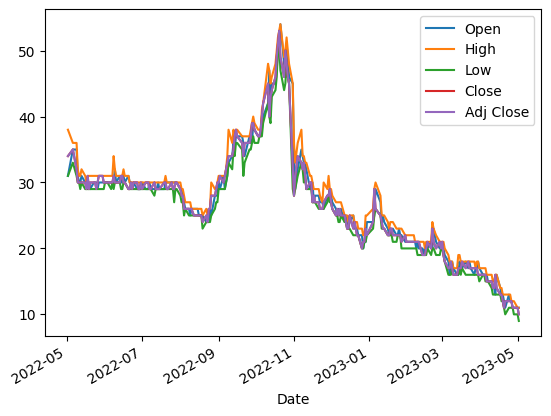

In [43]:
data = data.drop('Volume', axis=1)

#可視化する
data.plot()